## 데이터 준비하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from matplotlib import font_manager
plt.rc('font', family='NanumGothic')
%matplotlib inline


import datetime
import pandas_datareader.naver as web_naver

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler


import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('white')
np.random.seed(42)

In [3]:
kospi100 = pd.read_csv('KOSPI100.csv', encoding='cp949')
kospi100.head()

,종목코드,종목명,종가,대비,등락률,상장시가총액
0,5930,삼성전자,67400,-300,-0.44,402363344.0
1,373220,LG에너지솔루션,444000,4500,1.02,103896000.0
2,660,SK하이닉스,108000,1000,0.93,78624255.0
3,207940,삼성바이오로직스,847000,4000,0.47,60284378.0
4,35420,NAVER,288000,7000,2.49,47246136.0


In [4]:
kospi100 = kospi100.sort_values(by='상장시가총액', ascending=False).head(30)

In [5]:
code_list = kospi100['종목코드'].tolist()
name_list = kospi100['종목명'].tolist()

In [6]:
# 2020~2022년의 데이터를 가져온다
start = datetime.datetime(2020,1,1)
end = datetime.datetime(2022,1,1)
kospi100_dict = {}
for i in range(len(code_list)):
    code = str(code_list[i]).zfill(6)
    name = name_list[i]
    df = web_naver.NaverDailyReader(symbols=code, start=start, end=end, adjust_price=True).read()
    adj_close = df.Close
    kospi100_dict[name] = adj_close

In [7]:
kospi100_close = pd.DataFrame(kospi100_dict)
kospi100_close = kospi100_close.astype('float')

In [8]:
# 결측치가 있는 column들을 모두 제거
kospi100_close.dropna(inplace=True, axis=1)

In [9]:
# pct_change()를 이용해 일간 수익률을 계산하고, 첫행(NA)을 제거함
kospi100_returns = kospi100_close.pct_change()
kospi100_returns.dropna(inplace=True)
kospi100_returns= kospi100_returns[kospi100_returns.apply(lambda x :(x-x.mean()).abs()<(3*x.std()) ).all(1)]
kospi100_returns.head()

,삼성전자,SK하이닉스,삼성바이오로직스,NAVER,LG화학,현대차,삼성SDI,카카오,기아,POSCO홀딩스,...,SK,LG전자,HMM,한국전력,하나금융지주,삼성생명,두산에너빌리티,S-Oil,LG,SK텔레콤
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-03,0.005435,-0.002112,-0.015169,-0.005479,-0.009554,-0.016949,-0.012931,0.000000,-0.011765,0.004237,...,-0.005814,0.001408,0.006667,-0.008772,0.006954,0.002736,-0.001968,0.017410,0.007027,0.000000
2020-01-06,0.000000,-0.002116,-0.023697,-0.005510,-0.012862,0.000000,0.004367,0.013101,-0.002381,-0.025316,...,-0.021442,-0.016878,0.015894,-0.023009,-0.020718,-0.008186,-0.029580,-0.001070,-0.001405,-0.010700
2020-01-07,0.005405,-0.003181,0.016990,0.036011,0.013029,-0.004310,0.006522,0.035601,0.003580,0.004329,...,0.023904,0.005722,0.016949,-0.007246,0.002821,0.001376,-0.003658,-0.016060,0.013991,0.006484
2020-01-08,0.017921,0.036170,-0.025059,-0.021390,-0.028939,-0.030303,-0.010799,-0.003114,-0.017836,-0.017241,...,-0.048638,-0.039829,-0.034615,-0.034672,-0.016878,-0.016484,-0.039772,-0.041349,-0.016543,-0.002139
2020-01-09,0.031690,0.016427,0.028153,0.016393,0.014901,-0.004464,0.015284,0.028206,-0.013317,0.026316,...,0.010225,-0.013333,0.022576,0.017013,0.002861,0.008380,0.020816,-0.007946,-0.001410,-0.002169


In [10]:
# # 윈저화를 진행
# # 2.5%를 기준으로 상위 2.5%와 하위 2.5% 값들을 각각 상위2.5%, 하위 2.5%의 값으로 치환함.
# kospi100_returns = kospi100_returns.clip(lower = kospi100_returns.quantile(q=0.025),
#                       upper = kospi100_returns.quantile(q=0.975),
#                       axis=1)

In [11]:
scaler = StandardScaler()
scaled_returns = scaler.fit_transform(kospi100_returns)
scaled_data = pd.DataFrame(scaled_returns, columns=kospi100_returns.columns, index= kospi100_returns.index)
scaled_data.head()

,삼성전자,SK하이닉스,삼성바이오로직스,NAVER,LG화학,현대차,삼성SDI,카카오,기아,POSCO홀딩스,...,SK,LG전자,HMM,한국전력,하나금융지주,삼성생명,두산에너빌리티,S-Oil,LG,SK텔레콤
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-03,0.329552,-0.136367,-0.767418,-0.340440,-0.421583,-0.858949,-0.652383,-0.109932,-0.559539,0.199977,...,-0.171797,0.080817,0.109805,-0.487312,0.369737,0.204653,-0.120070,0.840670,0.378061,-0.009698
2020-01-06,-0.027148,-0.136580,-1.177312,-0.341955,-0.552185,-0.001047,0.144501,0.521576,-0.127023,-1.224891,...,-0.875933,-0.730434,0.393565,-1.376609,-1.099553,-0.390641,-0.916279,-0.001212,-0.034587,-0.712349
2020-01-07,0.327624,-0.187441,0.778420,1.741586,0.470135,-0.219220,0.243775,1.606202,0.147727,0.204399,...,1.167145,0.272206,0.426012,-0.392019,0.150279,0.130499,-0.168793,-0.684130,0.718857,0.416124
2020-01-08,1.149069,1.691984,-1.242811,-1.138862,-1.187000,-1.534871,-0.554170,-0.260035,-0.839373,-0.835569,...,-2.101216,-1.748671,-1.159704,-2.105109,-0.895633,-0.842936,-1.210161,-1.836236,-0.775448,-0.150179
2020-01-09,2.052768,0.749056,1.315008,0.757158,0.544026,-0.227012,0.647432,1.249732,-0.631096,1.264443,...,0.550826,-0.573193,0.599061,1.123337,0.152422,0.512284,0.536917,-0.314461,-0.034876,-0.152117


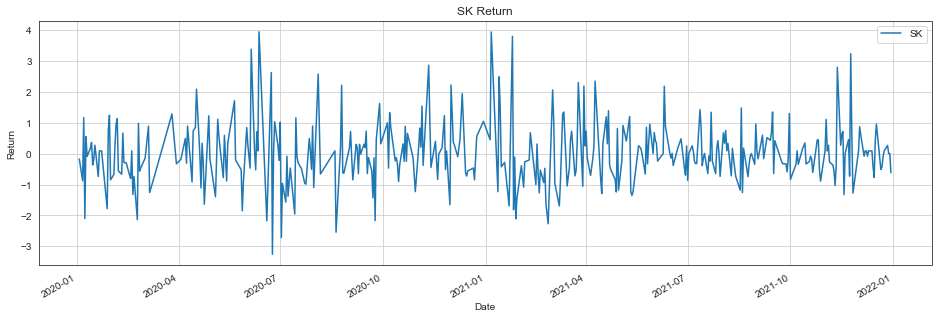

In [12]:
plt.figure(figsize=(16, 5))
plt.title("SK Return")
plt.ylabel("Return")
scaled_data['SK'].plot()
plt.grid(True);
plt.legend()
plt.show()

## 모델사용하기

### 훈련 세트와 테스트 세트 나누기

In [13]:
# Dividing the dataset into training and testing sets
percentage = int(len(scaled_data) * 0.8)
X_train = scaled_data[:percentage]
X_test = scaled_data[percentage:]

X_train_raw = kospi100_returns[:percentage]
X_test_raw = kospi100_returns[percentage:]


stock_tickers = scaled_data.columns.values
n_tickers = len(stock_tickers)

### 모델 사용하고 평가하기

In [14]:
pca = PCA()
PrincipalComponent=pca.fit(X_train)

In [15]:
pca.components_[0]

array([-0.24883463, -0.19188332, -0.10945277, -0.1297037 , -0.16367339,
       -0.25565651, -0.17622111, -0.11035718, -0.24292159, -0.2090499 ,
       -0.2345345 , -0.24646928, -0.10695992, -0.25301338, -0.24230366,
       -0.17554644, -0.19291766, -0.18173046, -0.09768784, -0.18045648,
       -0.23083228, -0.23325586, -0.13104412, -0.21023206, -0.21310323,
       -0.16371218])

<AxesSubplot:title={'center':'Cumulative Explained Variance by factor'}>

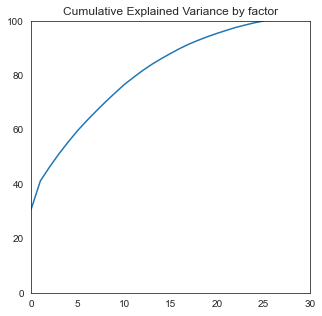

In [16]:
NumEigenvalues= 30
plt.figure(figsize=(5,5))
Series1 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).sort_values()*100
Series2 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).cumsum()*100;
Series2.plot(ylim=(0,100),xlim=(0,30), title='Cumulative Explained Variance by factor')

In [17]:
# explained_variance
### 0을 제외한 거의 모든 팩터들이 동일한 정도로 분산을 설명하는 것 같다.
pd.Series(np.cumsum(pca.explained_variance_ratio_)).to_frame('Explained Variance').head(20).style.format('{:,.2%}'.format)

,Explained Variance
0,30.65%
1,41.17%
2,46.33%
3,51.14%
4,55.53%
5,59.66%
6,63.36%
7,66.86%
8,70.23%
9,73.43%


In [18]:
def PCWeights():
    weights = pd.DataFrame()

    for i in range(len(pca.components_)):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i])

    weights = weights.values.T
    return weights

weights=PCWeights()

In [19]:
weights[0]

array([0.05045766, 0.03890931, 0.02219438, 0.02630078, 0.03318901,
       0.05184097, 0.03573339, 0.02237777, 0.04925863, 0.04239027,
       0.04755794, 0.04997802, 0.02168889, 0.05130501, 0.04913333,
       0.03559658, 0.03911905, 0.03685055, 0.01980874, 0.03659222,
       0.04680721, 0.04729866, 0.02657258, 0.04262999, 0.04321219,
       0.03319688])

array([[<AxesSubplot:title={'center':'Portfolio 0'}>],
       [<AxesSubplot:title={'center':'Portfolio 1'}>],
       [<AxesSubplot:title={'center':'Portfolio 2'}>],
       [<AxesSubplot:title={'center':'Portfolio 3'}>],
       [<AxesSubplot:title={'center':'Portfolio 4'}>]], dtype=object)

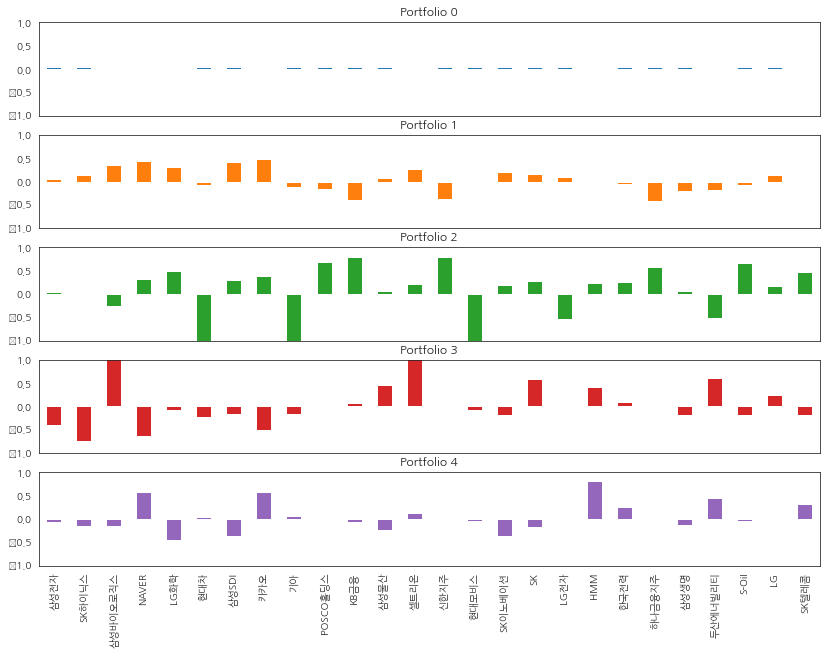

In [20]:
plt.rc('font', family='NanumGothic')
%matplotlib inline
NumComponents=5
        
topPortfolios = pd.DataFrame(pca.components_[:NumComponents], columns=scaled_data.columns)
eigen_portfolios = topPortfolios.div(topPortfolios.sum(1), axis=0)
eigen_portfolios.index = [f'Portfolio {i}' for i in range( NumComponents)]
np.sqrt(pca.explained_variance_)
eigen_portfolios.T.plot.bar(subplots=True, layout=(int(NumComponents),1), figsize=(14,10), legend=False, sharey=True, ylim= (-1,1))

#### Find the Best Eigen Portfolio

In [21]:
# Sharpe Ratio
def sharpe_ratio(ts_returns, periods_per_year=252):
    '''
    Sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
    It calculares the annualized return, annualized volatility, and annualized sharpe ratio.
    
    ts_returns are  returns of a signle eigen portfolio.
    '''
    n_years = ts_returns.shape[0]/periods_per_year
    annualized_return = np.power(np.prod(1+ts_returns),(1/n_years))-1
    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)
    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

Eigen portfolio #8 with the highest Sharpe. Return 130.74%, vol = 144.42%, Sharpe = 0.91
      Return       Vol    Sharpe
8   1.307441  1.444183  0.905316
3   0.177424  0.884704  0.200546
0   0.028094  0.186641  0.150526
10  0.002138  1.931247  0.001107
4  -0.046278  0.589549 -0.078498
14 -1.000000  8.232502 -0.121470
9  -0.329183  1.956130 -0.168283
21 -1.000000  5.346026 -0.187055
13 -0.999998  5.235893 -0.190989
1  -0.111908  0.478360 -0.233941


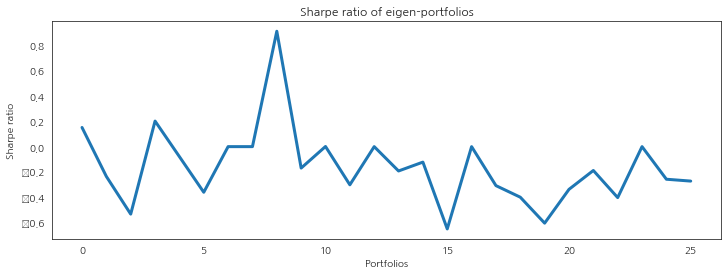

In [22]:
def optimizedPortfolio():
    n_portfolios = len(pca.components_)
    annualized_ret = np.array([0.] * n_portfolios)
    sharpe_metric = np.array([0.] * n_portfolios)
    annualized_vol = np.array([0.] * n_portfolios)
    highest_sharpe = 0 
    stock_tickers = scaled_data.columns.values
    n_tickers = len(stock_tickers)
    pcs = pca.components_
    
    for i in range(n_portfolios):
        
        pc_w = pcs[i] / sum(pcs[i])
        eigen_prtfi = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
        eigen_prtfi.sort_values(by=['weights'], ascending=False, inplace=True)
        eigen_prti_returns = np.dot(X_train_raw.loc[:, eigen_prtfi.index], pc_w)
        eigen_prti_returns = pd.Series(eigen_prti_returns.squeeze(), index=X_train_raw.index)
        er, vol, sharpe = sharpe_ratio(eigen_prti_returns)
        annualized_ret[i] = er
        annualized_vol[i] = vol
        sharpe_metric[i] = sharpe
        
        sharpe_metric= np.nan_to_num(sharpe_metric)
        
    # find portfolio with the highest Sharpe ratio
    highest_sharpe = np.argmax(sharpe_metric)

    print('Eigen portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f' % 
          (highest_sharpe,
           annualized_ret[highest_sharpe]*100, 
           annualized_vol[highest_sharpe]*100, 
           sharpe_metric[highest_sharpe]))


    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    ax.plot(sharpe_metric, linewidth=3)
    ax.set_title('Sharpe ratio of eigen-portfolios')
    ax.set_ylabel('Sharpe ratio')
    ax.set_xlabel('Portfolios')

    results = pd.DataFrame(data={'Return': annualized_ret, 'Vol': annualized_vol, 'Sharpe': sharpe_metric})
    results.dropna(inplace=True)
    results.sort_values(by=['Sharpe'], ascending=False, inplace=True)
    print(results.head(10))

    plt.show()

optimizedPortfolio()

Sum of weights of current eigen-portfolio: 100.00


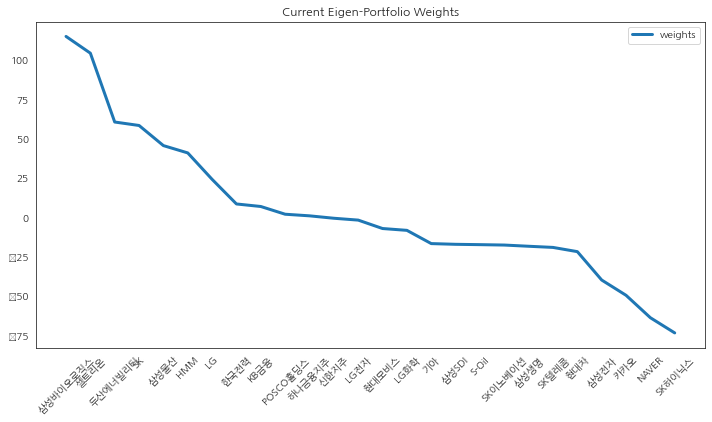

,weights
삼성바이오로직스,115.151815
셀트리온,104.499949
두산에너빌리티,60.762051
SK,58.563797
삼성물산,45.778893
HMM,41.132193
LG,24.339321
한국전력,8.699730
KB금융,7.090459
POSCO홀딩스,2.178490


In [23]:
plt.rc('font', family='NanumGothic')
%matplotlib inline
weights = PCWeights()
portfolio = portfolio = pd.DataFrame()

def plotEigen(weights, plot=False, portfolio=portfolio):
    portfolio = pd.DataFrame(data ={'weights': weights.squeeze()*100}, index = stock_tickers) 
    portfolio.sort_values(by=['weights'], ascending=False, inplace=True)
    if plot:
        print('Sum of weights of current eigen-portfolio: %.2f' % np.sum(portfolio))
        portfolio.plot(title='Current Eigen-Portfolio Weights', 
            figsize=(12,6), 
            xticks=range(0, len(stock_tickers),1), 
            rot=45, 
            linewidth=3
            )
        plt.show()


    return portfolio

# Weights are stored in arrays, where 0 is the first PC's weights.
plotEigen(weights=weights[3], plot=True)

#### Backtest

Current Eigen-Portfolio:
Return = -86.27%
Volatility = 124.75%
Sharpe = -0.69


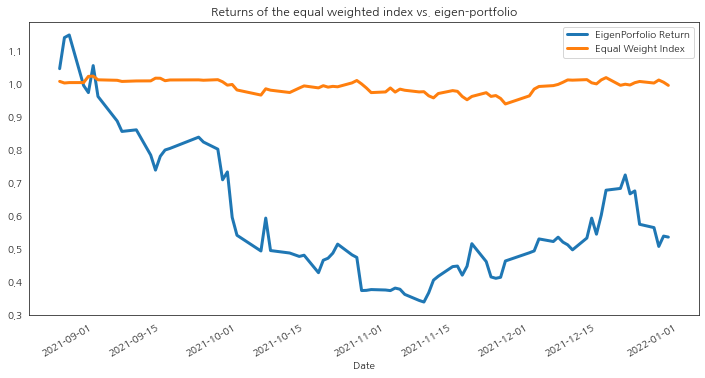

Current Eigen-Portfolio:
Return = 117.39%
Volatility = 76.42%
Sharpe = 1.54


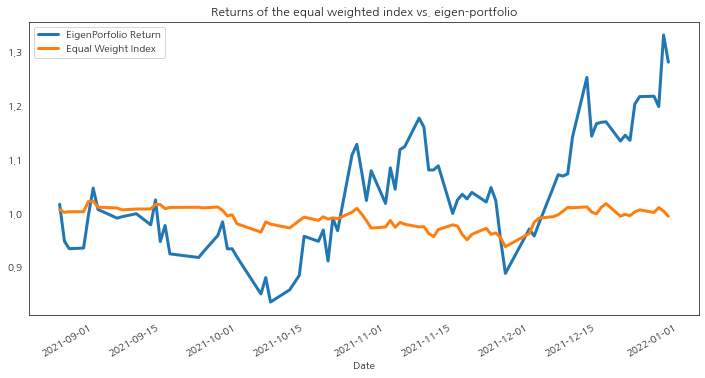

Current Eigen-Portfolio:
Return = -73.57%
Volatility = 79.79%
Sharpe = -0.92


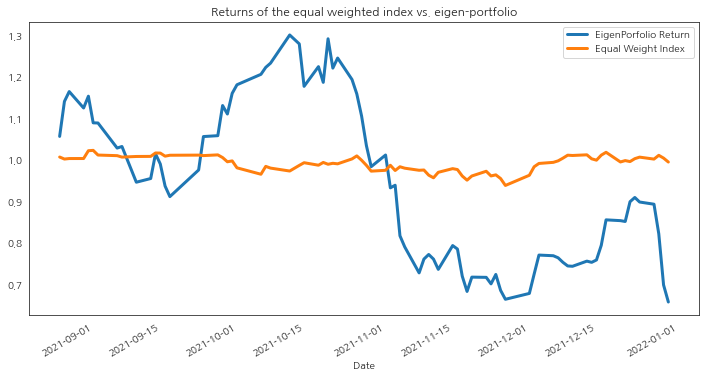

In [24]:
def Backtest(eigen):

    '''
    Plots Principle components returns against real returns.
    '''
    eigen_prtfi = pd.DataFrame(data ={'weights': eigen.squeeze()}, index = stock_tickers)
    eigen_prtfi.sort_values(by=['weights'], ascending=False, inplace=True)    

    eigen_prti_returns = np.dot(X_test_raw.loc[:, eigen_prtfi.index], eigen)
    eigen_portfolio_returns = pd.Series(eigen_prti_returns.squeeze(), index=X_test_raw.index)
    returns, vol, sharpe = sharpe_ratio(eigen_portfolio_returns)  
    print('Current Eigen-Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (returns*100, vol*100, sharpe))
    equal_weight_return=(X_test_raw * (1/len(pca.components_))).sum(axis=1)    
    df_plot = pd.DataFrame({'EigenPorfolio Return': eigen_portfolio_returns, 'Equal Weight Index': equal_weight_return}, index=X_test.index)
    np.cumprod(df_plot + 1).plot(title='Returns of the equal weighted index vs. eigen-portfolio' , 
                          figsize=(12,6), linewidth=3)
    plt.show()

Backtest(eigen=weights[8]) # 1등
Backtest(eigen=weights[3]) # 2등
Backtest(eigen=weights[15]) # 뒤에서 1등